### Start

### Installing required libraries


In [ ]:
!pip install --upgrade --force-reinstall "transformers[torch]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 60.1 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.

In [6]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

### Import dataset from huggingface

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

from datasets import load_dataset

ds = load_dataset("stanfordnlp/imdb")

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128)

tokenized_datasets = ds.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset

ds = load_dataset("stanfordnlp/imdb")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Fine-Tuning distilbert

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

Using device: cuda


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.304800,0.301908
2,0.263600,0.324584
3,0.192700,0.421654


TrainOutput(global_step=4689, training_loss=0.23911740392046102, metrics={'train_runtime': 1179.4668, 'train_samples_per_second': 63.588, 'train_steps_per_second': 3.976, 'total_flos': 2483763724800000.0, 'train_loss': 0.23911740392046102, 'epoch': 3.0})

### Saving the fine-tuned model

In [ ]:
model_save_path = "./finetuned_final_bert_model"
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

('./finetuned_final_bert_model/tokenizer_config.json',
 './finetuned_final_bert_model/special_tokens_map.json',
 './finetuned_final_bert_model/vocab.txt',
 './finetuned_final_bert_model/added_tokens.json',
 './finetuned_final_bert_model/tokenizer.json')

### Downloading the zip file of the fine-tuned model

In [ ]:
import shutil
from google.colab import files

shutil.make_archive(model_save_path, 'zip', model_save_path)

files.download(f"{model_save_path}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Loading the model for evaluation (from local space)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "/content/drive/MyDrive/finetuned_final_bert_model"
FineTunedModel = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)
FineTunedTokenizer = AutoTokenizer.from_pretrained(model_path)

FineTunedModel.eval()
texts = ["Ephemeral Echoes weaves visionary direction, breathtaking cinematography, poetic script, haunting score, and nuanced performances into a profound meditation on time and human connection.", "who would love this?"]

inputs = FineTunedTokenizer(texts, return_tensors='pt', truncation=True, padding=True, max_length=128)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
FineTunedModel.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = FineTunedModel(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)

labels = ["negative", "positive"]
predicted_labels = [labels[prediction] for prediction in predictions]

for text, label in zip(texts, predicted_labels):
    print(f"Text: {text} -> Sentiment: {label}")

Text: Ephemeral Echoes weaves visionary direction, breathtaking cinematography, poetic script, haunting score, and nuanced performances into a profound meditation on time and human connection. -> Sentiment: positive
Text: who would love this? -> Sentiment: negative


### Evaluation

In [ ]:
from datasets import load_metric
from transformers import Trainer, TrainingArguments

def evaluate_model(model, tokenizer, dataset):
    metric = load_metric("accuracy")

    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True)

    tokenized_dataset = ds.map(tokenize_function, batched=True)

    def compute_metrics(p):
        predictions = p.predictions.argmax(axis=1)
        references = p.label_ids
        accuracy = metric.compute(predictions=predictions, references=references)
        return {'accuracy': accuracy['accuracy']}

    training_args = TrainingArguments(
        output_dir='./results',
        evaluation_strategy='epoch',
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir='./logs',  # directory for storing logs
        logging_steps=10,
    )


    trainer = Trainer(
        model=model,
        args=training_args,
        compute_metrics=compute_metrics,
        train_dataset=tokenized_dataset['train'],
        eval_dataset=tokenized_dataset['test'],
    )

    # Evaluate the model
    evaluation_results = trainer.evaluate()

    return evaluation_results

### Evaluating the pre-trained model based on its accuracy

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)
pre_evaluation_results = evaluate_model(model,tokenizer, ds)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
print(f"Accuracy BEFORE finetraining: {pre_evaluation_results['eval_accuracy']:.2f}")

Accuracy BEFORE finetraining: 0.49


### Evaluating the fine-tuned model based on its accuracy

In [ ]:
post_evaluation_results = evaluate_model(FineTunedModel, FineTunedTokenizer, ds)

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
print(f"Accuracy AFTER finetraining: {post_evaluation_results['eval_accuracy']:.2f}")

Accuracy AFTER finetraining: 0.93


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer

# Define the Trainer
training_args = TrainingArguments(
    per_device_eval_batch_size=16,
    output_dir='./results'
)
trainer = Trainer(model=FineTunedModel, args=training_args)

# Evaluate the model on the test set
eval_results = trainer.predict(tokenized_datasets['test'])

# Calculate accuracy
from sklearn.metrics import accuracy_score

predictions = eval_results.predictions.argmax(axis=-1)
labels = tokenized_datasets['test']['label']
accuracy = accuracy_score(labels, predictions)
print(f"Accuracy after fine-tuning: {accuracy}")


Accuracy after fine-tuning: 0.88036


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)

# Define the Trainer
training_args = TrainingArguments(
    per_device_eval_batch_size=16,
    output_dir='./results'
)
trainer = Trainer(model=model, args=training_args)

# Evaluate the model on the test set
pre_eval_results = trainer.predict(tokenized_datasets['test'])

# Calculate accuracy
p_predictions = pre_eval_results.predictions.argmax(axis=-1)
p_labels = tokenized_datasets['test']['label']
p_accuracy = accuracy_score(p_labels, p_predictions)
print(f"Accuracy Before fine-tuning: {p_accuracy}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy Before fine-tuning: 0.47876


### Visualising the comparison

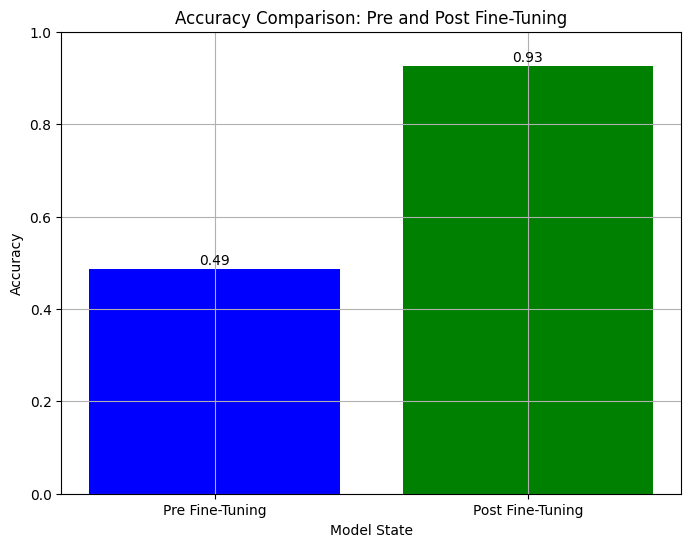

In [ ]:
import matplotlib.pyplot as plt

pre_fine_tuning_accuracy =pre_evaluation_results['eval_accuracy']
post_fine_tuning_accuracy = post_evaluation_results['eval_accuracy']

# Data for plotting
accuracies = [pre_fine_tuning_accuracy, post_fine_tuning_accuracy]
labels = ['Pre Fine-Tuning', 'Post Fine-Tuning']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Model State')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Pre and Post Fine-Tuning')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(True)

# Adding the exact accuracy values on the bars
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')

# Display the plot
plt.show()
